#Student Name:
#Student ID:

#Student Name:
#Student ID:

#Student Name:
#Student ID:

#Student Name:
#Student ID:

In [1]:
import numpy as np
import pandas as pd
import re

In [2]:
# Following code is from https://github.com/amclean3695/Communities-and-Crime/blob/master/Communities_and_Crime.ipynb
# TODO : See is there any other means for pulling column names from C45 file format
#Reads in names from textfile and performs regex to extract the attribute names 
textfile = open('communities.names','r')
filetext = textfile.read()
textfile.close()
matches = re.findall(r'-{2}\s(\w+)\:{1}', filetext)
col_names = matches[2:] #corresponds to the 128 attributes

In [3]:
df = pd.read_csv('communities.data', header=None, names=col_names)

#data_url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/communities/communities.data'
#df = pd.read_csv(data_url, header=None)
# The above code does not work as PythonAnywhere blocks outgoing connections for free accounts to non-whitelisted sites

#print(df.head(5))
#dir(df)
print(df.shape)
#print(df['ViolentCrimesPerPop'].value_counts())

(1994, 128)


### Remove Non-Predictive Attributes

Of the 128 attributes loaded, for this dataset it is stated that:

Attribute Information: (122 predictive, 5 non-predictive, 1 goal) 
* state: US state (by number) - not counted as predictive above, but if considered, should be consided nominal (nominal) 
* county: numeric code for county - not predictive, and many missing values (numeric) 
* community: numeric code for community - not predictive and many missing values (numeric) 
* communityname: community name - not predictive - for information only (string) 
* fold: fold number for non-random 10 fold cross validation, potentially useful for debugging, paired tests - not predictive (numeric) 

Therefore, the first five columns shall be removed from the dataset

In [4]:
df = df.drop(['state', 'county', 'community', 'communityname', 'fold'], axis=1)
print(df.shape)


(1994, 123)


In [5]:
#print(df.head(5))
# From DePy_Talk Noteboook
# How much of your data is missing?
df.isnull().sum().sort_values(ascending=False).head()

ViolentCrimesPerPop    0
PctNotHSGrad           0
PctUnemployed          0
PctEmploy              0
PctEmplManu            0
dtype: int64

There are no cells with missing data
However, visually inspecting the data, there are cells with "?" and this needs to be replaced with "NaN" (Not a Number)

In [6]:
df = df.replace('?', np.nan)
print(df.columns[df.isnull().any()])

Index(['OtherPerCap', 'LemasSwornFT', 'LemasSwFTPerPop', 'LemasSwFTFieldOps',
       'LemasSwFTFieldPerPop', 'LemasTotalReq', 'LemasTotReqPerPop',
       'PolicReqPerOffic', 'PolicPerPop', 'RacialMatchCommPol',
       'PctPolicWhite', 'PctPolicBlack', 'PctPolicHisp', 'PctPolicAsian',
       'PctPolicMinor', 'OfficAssgnDrugUnits', 'NumKindsDrugsSeiz',
       'PolicAveOTWorked', 'PolicCars', 'PolicOperBudg', 'LemasPctPolicOnPatr',
       'LemasGangUnitDeploy', 'PolicBudgPerPop'],
      dtype='object')


In [7]:
df.isnull().sum().sort_values(ascending=False).head(25)

LemasSwFTFieldPerPop    1675
PctPolicAsian           1675
PolicBudgPerPop         1675
LemasSwornFT            1675
LemasSwFTPerPop         1675
LemasSwFTFieldOps       1675
LemasTotalReq           1675
LemasTotReqPerPop       1675
PolicReqPerOffic        1675
PolicPerPop             1675
RacialMatchCommPol      1675
PctPolicBlack           1675
PctPolicHisp            1675
PctPolicWhite           1675
PctPolicMinor           1675
PolicCars               1675
LemasGangUnitDeploy     1675
LemasPctPolicOnPatr     1675
OfficAssgnDrugUnits     1675
PolicOperBudg           1675
PolicAveOTWorked        1675
NumKindsDrugsSeiz       1675
OtherPerCap                1
PctLess9thGrade            0
PctPopUnderPov             0
dtype: int64

In [8]:
#print(df.isnull().sum())
print(df.shape)
print(df.shape[0])
print(df['LemasSwFTFieldPerPop'].isnull().sum())
for column in df:
    if(df[column].isnull().sum()>=(df.shape[0]/2)):
        print("Column ", column, df[column].isnull().sum())
        df = df.drop([column], axis=1)
print(df.shape)

(1994, 123)
1994
1675
Column  LemasSwornFT 1675
Column  LemasSwFTPerPop 1675
Column  LemasSwFTFieldOps 1675
Column  LemasSwFTFieldPerPop 1675
Column  LemasTotalReq 1675
Column  LemasTotReqPerPop 1675
Column  PolicReqPerOffic 1675
Column  PolicPerPop 1675
Column  RacialMatchCommPol 1675
Column  PctPolicWhite 1675
Column  PctPolicBlack 1675
Column  PctPolicHisp 1675
Column  PctPolicAsian 1675
Column  PctPolicMinor 1675
Column  OfficAssgnDrugUnits 1675
Column  NumKindsDrugsSeiz 1675
Column  PolicAveOTWorked 1675
Column  PolicCars 1675
Column  PolicOperBudg 1675
Column  LemasPctPolicOnPatr 1675
Column  LemasGangUnitDeploy 1675
Column  PolicBudgPerPop 1675
(1994, 101)


In [9]:
df.isnull().sum().sort_values(ascending=False).head(25)

OtherPerCap            1
PctOccupManu           0
HispPerCap             0
NumUnderPov            0
PctPopUnderPov         0
PctLess9thGrade        0
PctNotHSGrad           0
PctBSorMore            0
PctUnemployed          0
PctEmploy              0
PctEmplManu            0
PctEmplProfServ        0
ViolentCrimesPerPop    0
NumIlleg               0
MalePctDivorce         0
MalePctNevMarr         0
FemalePctDiv           0
TotalPctDiv            0
PersPerFam             0
PctFam2Par             0
PctKids2Par            0
PctYoungKids2Par       0
PctTeen2Par            0
PctWorkMomYoungKids    0
PctOccupMgmtProf       0
dtype: int64

There is only one missing value remaining but lets impute it for the craic using code from the DePy_Talk notebook

In [10]:
# print(df['OtherPerCap'][130])

# # dir(sklearn)
# # from sklearn.impute import SimpleImputer

# # imp = SimpleImputer(missing_values=np.nan, strategy='mean')
# # imp.fit(df) 
# # X = pd.DataFrame(data=imp.transform(df) , columns=df.columns)

# from sklearn.impute import SimpleImputer
# my_imputer = SimpleImputer()

#TEMP WORKAROUND
# Set to median
print(df['OtherPerCap'][130])
#print(df['OtherPerCap'].median())
#print(df['OtherPerCap'].mean())
dir(df['OtherPerCap'])
miss_median = df['OtherPerCap'].median()
df['OtherPerCap'][130] = miss_median
print(df['OtherPerCap'][130])

nan
0.25


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


### Outlier Detection

In [11]:
# From DePy_Talk Notebook
# def find_outliers_tukey(x):
#     q1 = np.percentile(x, 25)
#     q3 = np.percentile(x, 75)
#     iqr = q3-q1
#     floor = q1 - 1.5*iqr
#     ceiling = q3 + 1.5*iqr
#     outlier_indices = list(x.index[(x < floor)|(x > ceiling)])
#     outlier_values = list(x[outlier_indices])
    
#     return outlier_indices, outlier_values

# tukey_indices, tukey_values = find_outliers_tukey(df['ViolentCrimesPerPop'])

# print("Shape Before Outlier Removal")
# print(df.shape)
# print("Entry 26", df['ViolentCrimesPerPop'][26])
# print("Outliers = ",len(tukey_indices), "out of ",len(df['ViolentCrimesPerPop']))
# print(np.sort(tukey_values))
# print(np.sort(tukey_indices))
# for i in range(len(tukey_indices)):
#     print("i : ", i, "Index", tukey_indices[i], "Value", tukey_values[i])
#     # Drop row containing the outlier
#     df = df.drop([tukey_indices[i]], axis=0)
# print("Shape After Outlier Removal")
# print(df.shape)


In [12]:
print(df['ViolentCrimesPerPop'])

0       0.20
1       0.67
2       0.43
3       0.12
4       0.03
5       0.14
6       0.03
7       0.55
8       0.53
9       0.15
10      0.24
11      0.08
12      0.06
13      0.09
14      0.21
15      0.30
16      0.49
17      0.07
18      0.15
19      0.03
20      0.34
21      0.69
22      0.21
23      0.63
24      0.31
25      0.12
26      0.84
27      0.10
28      0.49
29      0.02
        ... 
1964    0.60
1965    0.69
1966    0.30
1967    0.04
1968    0.19
1969    0.75
1970    0.53
1971    0.22
1972    0.30
1973    0.04
1974    0.52
1975    0.09
1976    0.08
1977    0.25
1978    0.04
1979    0.16
1980    0.28
1981    0.07
1982    0.03
1983    0.56
1984    0.14
1985    0.14
1986    0.02
1987    0.04
1988    0.19
1989    0.09
1990    0.45
1991    0.23
1992    0.19
1993    0.48
Name: ViolentCrimesPerPop, Length: 1994, dtype: float64


### Split Up Dataset

In [13]:
print(df.shape)
print(df.head())
dataset = df.values
print(dataset.shape)
X = dataset[:, 0:100]
y = dataset[:, 100]
print(X[0])
#X = df[:,0:100].values
#y = df[:,100].values

from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1) 

(1994, 101)
   population  householdsize  racepctblack  racePctWhite  racePctAsian  \
0        0.19           0.33          0.02          0.90          0.12   
1        0.00           0.16          0.12          0.74          0.45   
2        0.00           0.42          0.49          0.56          0.17   
3        0.04           0.77          1.00          0.08          0.12   
4        0.01           0.55          0.02          0.95          0.09   

   racePctHisp  agePct12t21  agePct12t29  agePct16t24  agePct65up  \
0         0.17         0.34         0.47         0.29        0.32   
1         0.07         0.26         0.59         0.35        0.27   
2         0.04         0.39         0.47         0.28        0.32   
3         0.10         0.51         0.50         0.34        0.21   
4         0.05         0.38         0.38         0.23        0.36   

          ...           PctForeignBorn  PctBornSameState  PctSameHouse85  \
0         ...                     0.12              

In [14]:
# Scale the dataset
from sklearn.preprocessing import StandardScaler 
# Scale the data with respect to the training data set 
scaler = StandardScaler() 
scaler.fit(X_train) 

X_scaled_train = scaler.transform(X_train) 
# Scaling the test set using the transform defined by the train set. 
X_scaled_test = scaler.transform(X_test) 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [15]:
print(X_scaled_train.shape)
print(X_scaled_test.shape)

(1595, 100)
(399, 100)


In [16]:
from sklearn import linear_model
clf = linear_model.Lasso(alpha=0.1)
clf.fit(X_scaled_train, y_train)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [17]:
print(clf.coef_)
print(clf.intercept_)

[ 0.         -0.          0.         -0.00884085  0.          0.
  0.          0.          0.          0.          0.          0.
 -0.         -0.         -0.         -0.          0.          0.
 -0.         -0.         -0.         -0.         -0.         -0.
 -0.         -0.         -0.          0.          0.          0.
  0.         -0.          0.         -0.         -0.         -0.
  0.         -0.          0.          0.          0.          0.
  0.         -0.         -0.04255819 -0.         -0.         -0.
 -0.          0.          0.02973777  0.          0.          0.
  0.          0.          0.          0.          0.          0.
 -0.          0.          0.          0.          0.         -0.
  0.         -0.          0.          0.         -0.          0.
 -0.         -0.          0.         -0.         -0.          0.
  0.         -0.         -0.         -0.         -0.         -0.
 -0.         -0.          0.          0.         -0.          0.
  0.          0.         

In [18]:
y_hat = clf.predict(X_scaled_test)

In [19]:
print(y_hat.shape)
print(y_test.shape)
print(y_hat[0:5])
print(y_test[0:5])
print(clf.score(X_scaled_test,y_test))

(399,)
(399,)
[0.14694148 0.2124953  0.21826913 0.14784458 0.24289814]
[0.06 0.37 0.22 0.01 0.16]
0.38237857081575966


In [20]:
#from sklearn.metrics import accuracy_score
#accuracy_score(y_test, y_hat)
print(y_hat[0:20])
print(y_test[0:20])

[0.14694148 0.2124953  0.21826913 0.14784458 0.24289814 0.23580896
 0.25402694 0.2123818  0.28479683 0.29305254 0.28115104 0.1389661
 0.20613306 0.21422139 0.15303933 0.18130534 0.19264976 0.32337114
 0.15724881 0.30080873]
[0.06 0.37 0.22 0.01 0.16 0.08 0.1 0.1 0.28 0.28 0.46 0.03 0.09 0.22 0.05
 0.18 0.02 0.28 0.02 0.4]


In [21]:
from sklearn.metrics import mean_absolute_error
print("MAE ", mean_absolute_error(y_test, y_hat))
from sklearn.metrics import mean_squared_error
print("MSE ", mean_squared_error(y_test, y_hat))
from sklearn.metrics import r2_score
print("R2S ", r2_score(y_test, y_hat))

MAE  0.13532431502466125
MSE  0.03160776988933991
R2S  0.38237857081575966


### Gridsearch

In [22]:
from sklearn.linear_model import LassoCV
lasso_cv = LassoCV(alphas = None, cv = 10, max_iter = 100000, random_state=1) 
lasso_cv.fit(X_scaled_train, y_train)
print(lasso_cv.alpha_)
#print(lasso_cv.mse_path_)
#print(lasso_cv.alphas_)


0.00026548338126905035


In [23]:
y_hat_cv = lasso_cv.predict(X_scaled_test)
print(y_hat_cv[0:20])
print(y_test[0:20])
print("MAE ", mean_absolute_error(y_test, y_hat_cv))
print("MSE ", mean_squared_error(y_test, y_hat_cv))
print("R2S ", r2_score(y_test, y_hat_cv))

[0.01685027 0.22750934 0.22395349 0.06336561 0.26919941 0.06867553
 0.25835258 0.19704881 0.3652667  0.37689063 0.41573788 0.03772242
 0.14405546 0.28489078 0.05806651 0.14266713 0.09914984 0.41202055
 0.03072306 0.31259567]
[0.06 0.37 0.22 0.01 0.16 0.08 0.1 0.1 0.28 0.28 0.46 0.03 0.09 0.22 0.05
 0.18 0.02 0.28 0.02 0.4]
MAE  0.09440412324039878
MSE  0.019915866355066966
R2S  0.6108404394007163


### PCA

In [24]:
from sklearn.decomposition import PCA 
pca = PCA()
pca.fit(X_scaled_train)
X_pca_train = pca.transform(X_scaled_train)
print(pca.explained_variance_)
print(len(pca.explained_variance_))
print(X_pca_train.shape)
print(type(pca.explained_variance_))
print(pca.explained_variance_.sum())
print(pca.explained_variance_ratio_)

n_components_pca = 0

percent_contrib = 0.05

for i in range(len(pca.explained_variance_)):
    if(pca.explained_variance_ratio_[i]>=(percent_contrib/100)):
        n_components_pca+=1
print("Number of PCA components that contribute >=",percent_contrib,"% of variance is ",n_components_pca)

pca_red = PCA(n_components=n_components_pca)
pca_red.fit(X_scaled_train)
X_pca_red_train = pca_red.transform(X_scaled_train)
X_pca_red_test = pca_red.transform(X_scaled_test)
print(pca_red.explained_variance_)
print(len(pca_red.explained_variance_))
print(X_pca_red_train.shape)
print(X_pca_red_test.shape)
print(type(pca_red.explained_variance_))
print(pca_red.explained_variance_.sum())
print(pca_red.explained_variance_ratio_)
    

[2.52014345e+01 1.70928393e+01 9.24995793e+00 7.51310214e+00
 5.65483196e+00 4.18733429e+00 3.12493518e+00 2.93720440e+00
 2.04961291e+00 1.57447535e+00 1.48947512e+00 1.44793121e+00
 1.31392896e+00 1.05018140e+00 9.48935640e-01 8.93173588e-01
 8.59924189e-01 7.56221570e-01 7.00031745e-01 6.42938864e-01
 6.40089418e-01 5.89827402e-01 5.42676318e-01 5.26226642e-01
 4.90120834e-01 4.69805680e-01 4.58751775e-01 4.43615837e-01
 4.02068254e-01 3.90904462e-01 3.67367516e-01 3.51412481e-01
 3.28485534e-01 3.20834777e-01 2.93141963e-01 2.83276566e-01
 2.59503733e-01 2.58189057e-01 2.45232846e-01 2.25216612e-01
 2.12488957e-01 2.06977246e-01 1.97897008e-01 1.89709009e-01
 1.77319847e-01 1.70157385e-01 1.61053608e-01 1.41179674e-01
 1.37300868e-01 1.29464590e-01 1.12306670e-01 1.06415920e-01
 1.05196543e-01 1.03554550e-01 8.50974162e-02 8.17662908e-02
 7.64009192e-02 7.35851516e-02 6.81518439e-02 6.55112705e-02
 6.12743951e-02 6.02053821e-02 5.67368650e-02 5.07482317e-02
 4.80707947e-02 4.554700

In [25]:
clf_pca = linear_model.Lasso(alpha=0.1)
clf_pca.fit(X_pca_red_train, y_train)
y_pca_red_hat = clf_pca.predict(X_pca_red_test)
print(y_pca_red_hat.shape)
print(y_test.shape)
print(y_pca_red_hat[0:5])
print(y_test[0:5])
print(clf_pca.score(X_pca_red_test,y_test))
print("MAE ", mean_absolute_error(y_test, y_pca_red_hat))
from sklearn.metrics import mean_squared_error
print("MSE ", mean_squared_error(y_test, y_pca_red_hat))
from sklearn.metrics import r2_score
print("R2S ", r2_score(y_test, y_pca_red_hat))

(399,)
(399,)
[0.0083686  0.25464095 0.23178747 0.03165719 0.23805097]
[0.06 0.37 0.22 0.01 0.16]
0.465099605603045
MAE  0.11773506953747105
MSE  0.02737438790319668
R2S  0.465099605603045


In [26]:
lasso_pca_cv = LassoCV(alphas = None, cv = 10, max_iter = 1000, random_state=1) 
lasso_pca_cv.fit(X_pca_red_train, y_train)
print(lasso_pca_cv.alpha_)

y_pca_red_hat_cv = lasso_pca_cv.predict(X_pca_red_test)
print(y_pca_red_hat_cv[0:20])
print(y_test[0:20])
print("MAE ", mean_absolute_error(y_test, y_pca_red_hat_cv))
print("MSE ", mean_squared_error(y_test, y_pca_red_hat_cv))
print("R2S ", r2_score(y_test, y_pca_red_hat_cv))

0.0008520759729437642
[0.03784046 0.21464154 0.25413143 0.02427398 0.23433616 0.07318514
 0.23722693 0.17509777 0.36245331 0.32529445 0.41689605 0.03212898
 0.16543797 0.26179849 0.05609682 0.10878604 0.11369697 0.37295422
 0.03249444 0.32818123]
[0.06 0.37 0.22 0.01 0.16 0.08 0.1 0.1 0.28 0.28 0.46 0.03 0.09 0.22 0.05
 0.18 0.02 0.28 0.02 0.4]
MAE  0.09309396712587907
MSE  0.020249692469312807
R2S  0.6043174179252571


### Finally we will visualize the results by comparing predictive power of n_components classifier, original_classifier and the classifier after grid search

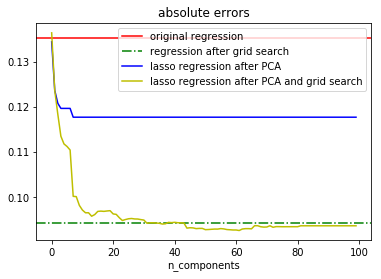

original_regression: 0.13532431502466125
regression after grid search: 0.09440412324039878
regression after PCA: 0.11773506953754075
regression after PCA and grid search: 0.09373978524984942


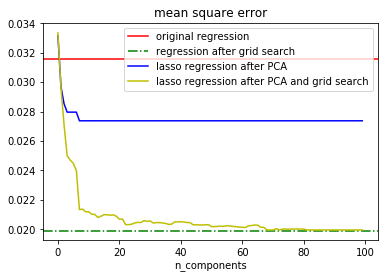

original_regression: 0.03160776988933991
regression after grid search: 0.019915866355066966
regression after PCA: 0.02737438790321136
regression after PCA and grid search: 0.019951521084783548


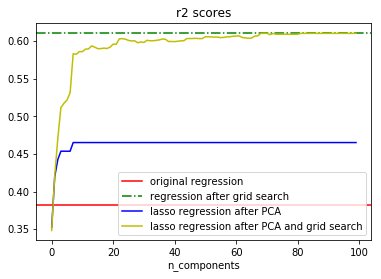

original_regression: 0.38237857081575966
regression after grid search: 0.6108404394007163
regression after PCA: 0.4650996056027581
regression after PCA and grid search: 0.6101437396587911


In [27]:
pca_for_count_of_components = PCA()
pca_for_count_of_components.fit(X_scaled_train)
total_components = len(pca.explained_variance_)
pca_results_n_components_lasso = []
pca_results_n_components_lasso_cv = []

for i in range(total_components):
    pca_n = PCA(n_components=i+1)
    pca_n.fit(X_scaled_train)
    X_pca_n_train = pca_n.transform(X_scaled_train)
    X_pca_n_test = pca_n.transform(X_scaled_test)
    clf_pca = linear_model.Lasso(alpha=0.1)
    clf_pca.fit(X_pca_n_train, y_train)
    y_n_hat = clf_pca.predict(X_pca_n_test)
    mae = mean_absolute_error(y_test, y_n_hat)
    mse = mean_squared_error(y_test, y_n_hat)
    r2s = r2_score(y_test, y_n_hat)
    pca_results_n_components_lasso.append((mae,mse,r2s))
    
    lasso_pca_cv_n = LassoCV(alphas = None, cv = 10, max_iter = 1000, random_state=1) 
    lasso_pca_cv_n.fit(X_pca_n_train, y_train)
    y_n_hat_cv = lasso_pca_cv_n.predict(X_pca_n_test)
    mae_cv = mean_absolute_error(y_test, y_n_hat_cv)
    mse_cv = mean_squared_error(y_test, y_n_hat_cv)
    r2s_cv = r2_score(y_test, y_n_hat_cv)
    pca_results_n_components_lasso_cv.append((mae_cv,mse_cv,r2s_cv))
    
    
maes, mses, r2ss = zip(*pca_results_n_components_lasso)
maes_cv, mses_cv, r2ss_cv = zip(*pca_results_n_components_lasso_cv)

from matplotlib.pylab import plt #load plot library
# indicate the output of plotting function is printed to the notebook
%matplotlib inline 


mae_original =  mean_absolute_error(y_test, y_hat)
mse_original =  mean_squared_error(y_test, y_hat)
r2s_original = r2_score(y_test, y_hat)

mae_cv =  mean_absolute_error(y_test, y_hat_cv)
mse_cv =  mean_squared_error(y_test, y_hat_cv)
r2s_cv = r2_score(y_test, y_hat_cv)

plt.title("absolute errors")
plt.xlabel("n_components")
plt.axhline(y=mae_original, color='r', linestyle='-', label="original regression")
plt.axhline(y=mae_cv, color='g', linestyle='-.', label="regression after grid search")
plt.plot(maes, color='b', label="lasso regression after PCA")
plt.plot(maes_cv, color='y', label="lasso regression after PCA and grid search")
plt.legend(loc='best')
plt.show()
print("original_regression: {}".format(mae_original))
print("regression after grid search: {}".format(mae_cv))
print("regression after PCA: {}".format(maes[-1]))
print("regression after PCA and grid search: {}".format(maes_cv[-1]))

plt.title("mean square error")
plt.xlabel("n_components")
plt.axhline(y=mse_original, color='r', linestyle='-', label="original regression")
plt.axhline(y=mse_cv, color='g', linestyle='-.', label="regression after grid search")
plt.plot(mses, color='b', label="lasso regression after PCA")
plt.plot(mses_cv, color='y', label="lasso regression after PCA and grid search")
plt.legend(loc='best')
plt.show()
print("original_regression: {}".format(mse_original))
print("regression after grid search: {}".format(mse_cv))
print("regression after PCA: {}".format(mses[-1]))
print("regression after PCA and grid search: {}".format(mses_cv[-1]))

plt.title("r2 scores")
plt.xlabel("n_components")
plt.axhline(y=r2s_original, color='r', linestyle='-', label="original regression")
plt.axhline(y=r2s_cv, color='g', linestyle='-.', label="regression after grid search")
plt.plot(r2ss, color='b', label="lasso regression after PCA")
plt.plot(r2ss_cv, color='y', label="lasso regression after PCA and grid search")
plt.legend(loc='best')
plt.show()
print("original_regression: {}".format(r2s_original))
print("regression after grid search: {}".format(r2s_cv))
print("regression after PCA: {}".format(r2ss[-1]))
print("regression after PCA and grid search: {}".format(r2ss_cv[-1]))